In [2]:
import json

# read jsonl file
path = "/mnt/ssd/Projects/lmms-eval/outputs/hrbench_intern35_8b-think/OpenGVLab__InternVL3_5-8B/20250928_145210_samples_hrbench8k.jsonl"
with open(path, "r") as f:
    data = [json.loads(line) for line in f]

print(data[:5])  # print first 5 entries

[{'doc_id': 0, 'target': 'A', 'filtered_resps': ['<think>\nSo the question is asking about the number above the entrance where the woman is standing. Let me look at the image again. The woman is standing at the bottom of a staircase, and there\'s a sign above the entrance. The sign says "27B". So the options are A. 27B, B. 27D, C. 27E, D. 37B.\n\nWait, the sign clearly shows "27B", so the answer should be A. But let me make sure I\'m not missing anything. The entrance is a stairwell, and the number is right above the doorway. There\'s no other number visible in the image. The other options have different letters or numbers, like 27D or 37B, but those aren\'t on the sign. So yeah, it\'s definitely 27B. The answer must be A.\n</think>\n\nThe number displayed above the entrance is clearly "27B" on the sign. \n\n**Answer:** A. 27B'], 'doc_hash': '74234e98afe7498fb5daf1f36ac2d78acc339464f950703b8c019892f982b90b', 'single': {'index': 0, 'cycle_category': '0', 'gpt_score': 1}, 'average': {'in

In [13]:
# Reorganize the data entries
reorganized_data = {0: [], 1: []}
for e in data:
    score = e["average"]["gpt_score"]
    reorganized_data[score].append(
        {
            "question": e["input"],
            "target": e["target"],
            "response": e["filtered_resps"][0],
        }
    )

print(reorganized_data[0][0])  # print first entry of score 0

{'question': 'What is written on the white board in front of the girl in purple shorts?\nA. ELEVATE\nB. ELEVATE.\nC. ELVTE\nD. CeVaY\n', 'target': 'A', 'response': '<think>\nOkay, let\'s look at the question. The user is asking what\'s written on the white board in front of the girl wearing purple shorts. The options are A. ELEVATE, B. ELEVATE., C. ELVTE, D. CeVaY.\n\nFirst, I need to visualize the image again. The girl in purple shorts is standing on a golf range, and there\'s a white board in front of her. The board has some text on it. The options are about the exact wording. Let me think about the possible typos or formatting.\n\nOption A is "ELEVATE" without a period. Option B adds a period at the end. The original text might have a period or not. Sometimes in such contexts, especially on signage, they might include a period. But I\'m not sure. Let me think again. The board says "ELEVATE" with a period? Or not?\n\nWait, the options are A and B. The difference is the period. The ot

In [14]:
print(len(reorganized_data[0]), len(reorganized_data[1]))  # print lengths of both lists

355 445


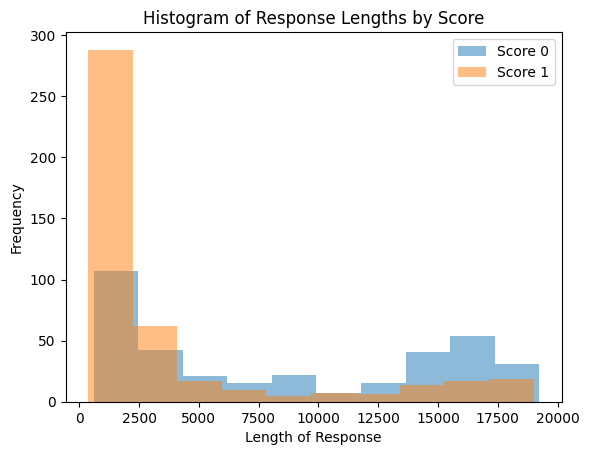

In [15]:
# Plot histogram of lengths of responses for both scores
import matplotlib.pyplot as plt

lengths_0 = [len(r["response"]) for r in reorganized_data[0]]
lengths_1 = [len(r["response"]) for r in reorganized_data[1]]  # assuming response is a string
plt.hist(lengths_0, alpha=0.5, label="Score 0")
plt.hist(lengths_1, alpha=0.5, label="Score 1")
plt.legend(loc="upper right")
plt.xlabel("Length of Response")
plt.ylabel("Frequency")
plt.title("Histogram of Response Lengths by Score")
plt.show()